In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [7]:
df = pd.read_csv("/content/drive/MyDrive/2078_Akalya_Multiple Disease/2078_Akalya_Multiple Disease/diabetes.csv")

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [10]:
df.duplicated().any()

np.False_

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
print("🔹 Dataset shape:", df.shape, "\n")
print("🔹 Column data types:")
print(df.dtypes, "\n")

print("🔹 Statistical summary:")
print(df.describe(), "\n")

print("🔹 Class balance (Outcome):")
print(df['Outcome'].value_counts(), "\n")

🔹 Dataset shape: (768, 9) 

🔹 Column data types:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object 

🔹 Statistical summary:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.00

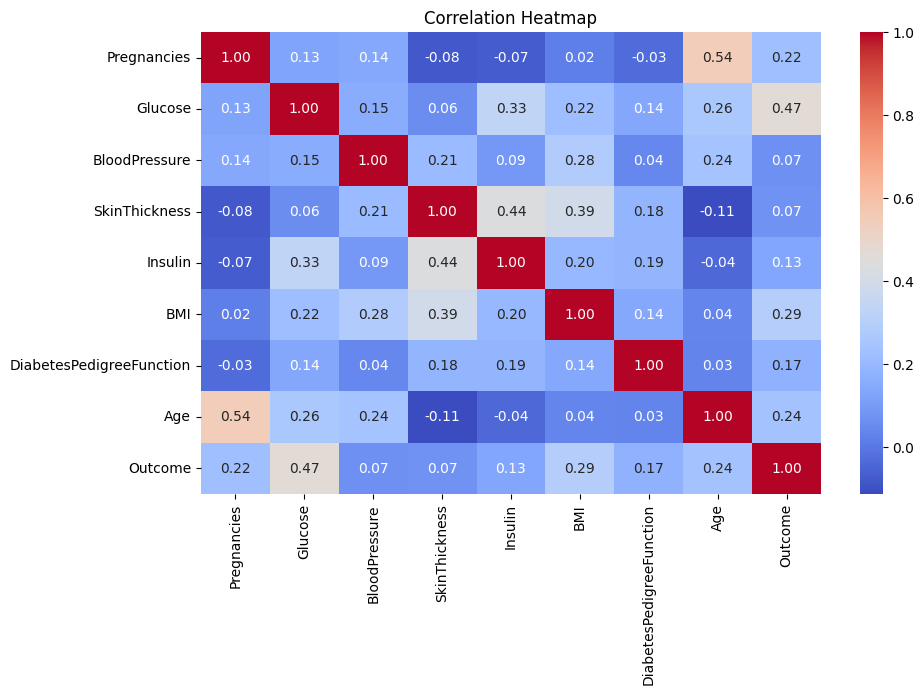

In [13]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


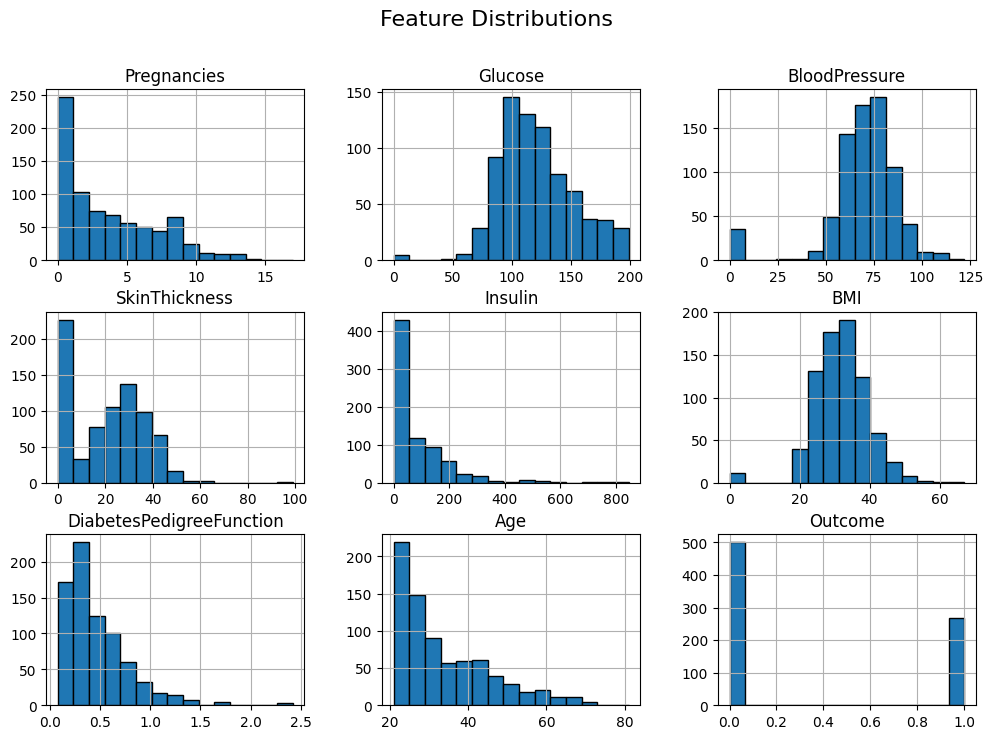

In [14]:
# Distribution of each feature
df.hist(figsize=(12, 8), bins=15, edgecolor="black")
plt.suptitle("Feature Distributions", size=16)
plt.show()

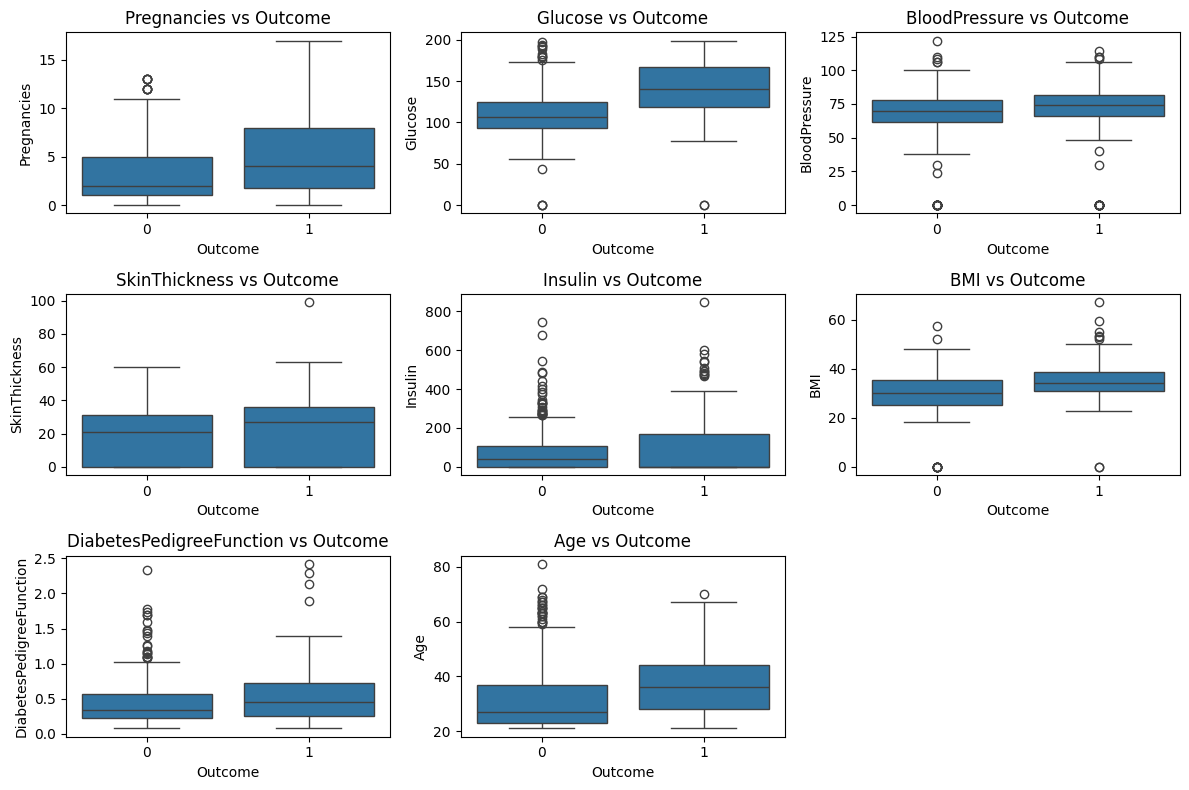

In [15]:
# Boxplots grouped by outcome
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x="Outcome", y=col, data=df)
    plt.title(f"{col} vs Outcome")
plt.tight_layout()
plt.show()

In [16]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# Your dataframe df already exists

# Columns that cannot be zero
cols_with_invalid_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Step 1: Replace zeros with NaN
df[cols_with_invalid_zeros] = df[cols_with_invalid_zeros].replace(0, np.nan)

# Step 2: Apply KNN imputer
imputer = KNNImputer(n_neighbors=5)  # You can adjust k
df_imputed = pd.DataFrame(
    imputer.fit_transform(df),
    columns=df.columns
)

# Step 3: Check if NaNs are gone
print("Any missing left?", df_imputed[cols_with_invalid_zeros].isna().sum())

Any missing left? Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


In [17]:
X = df.drop(columns=["Outcome"])
y = df['Outcome']

In [18]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

🔧 Training: XGBoost


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [04:25:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ XGBoost Accuracy: 0.7013
🔧 Training: SVM
✅ SVM Accuracy: 0.7208
🔧 Training: RandomForest
✅ RandomForest Accuracy: 0.6753
🔧 Training: DecisionTree
✅ DecisionTree Accuracy: 0.6753
🔧 Training: KNN
✅ KNN Accuracy: 0.6883


/tmp/ipython-input-3220945004.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=metrics_df, palette="Set2")
/tmp/ipython-input-3220945004.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=metrics_df, palette="Set2")
/tmp/ipython-input-3220945004.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=metrics_df, palette="Set2")
/tmp/ipython-input-3220945004.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in

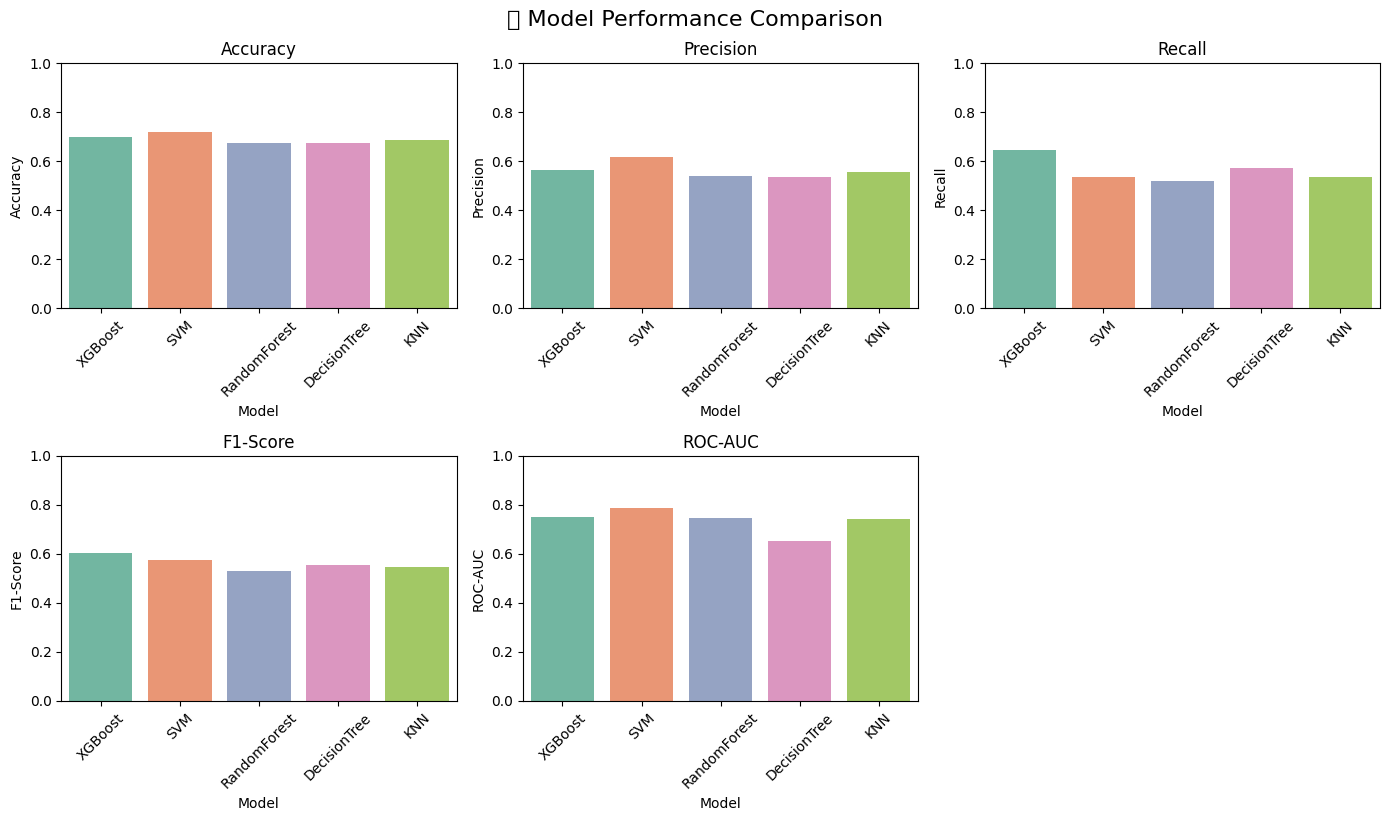

In [27]:
# === Full Training & Saving Script ===

import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/2078_Akalya_Multiple Disease/2078_Akalya_Multiple Disease/diabetes.csv")

# Replace invalid zeros with NaN
invalid_cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[invalid_cols] = df[invalid_cols].replace(0, np.nan)

# Split features and target
feature_cols = df.columns.drop("Outcome")
X_raw = df[feature_cols]
y = df["Outcome"]

# KNN Imputer (only on features)
imputer = KNNImputer(n_neighbors=5)
X_imputed = pd.DataFrame(imputer.fit_transform(X_raw), columns=feature_cols)

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# PCA
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, stratify=y, random_state=42)

# Define models
models = {
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC(probability=True),
    "RandomForest": RandomForestClassifier(),
    "DecisionTree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier()
}

# For plotting
metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "ROC-AUC": [],
    "Training Time (s)": []
}

# Train, Evaluate, Save
for name, model in models.items():
    print(f"🔧 Training: {name}")
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()

    # Save model
    with open(f"{name}_model.pkl", "wb") as f:
        pickle.dump(model, f)

    # Predict
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Metrics
    metrics["Model"].append(name)
    metrics["Accuracy"].append(accuracy_score(y_test, y_pred))
    metrics["Precision"].append(precision_score(y_test, y_pred))
    metrics["Recall"].append(recall_score(y_test, y_pred))
    metrics["F1-Score"].append(f1_score(y_test, y_pred))
    metrics["ROC-AUC"].append(roc_auc_score(y_test, y_prob))
    metrics["Training Time (s)"].append(round(end - start, 2))

    print(f"✅ {name} Accuracy: {metrics['Accuracy'][-1]:.4f}")

# Save pre-processing objects
with open("imputer.pkl", "wb") as f:
    pickle.dump(imputer, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

with open("pca.pkl", "wb") as f:
    pickle.dump(pca, f)

# Plot results
metrics_df = pd.DataFrame(metrics)

plt.figure(figsize=(14, 8))
for i, metric in enumerate(["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]):
    plt.subplot(2, 3, i+1)
    sns.barplot(x="Model", y=metric, data=metrics_df, palette="Set2")
    plt.title(metric)
    plt.ylim(0, 1)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.suptitle("📊 Model Performance Comparison", fontsize=16, y=1.02)
plt.show()


In [29]:

import os
import pickle


# 9. Save preprocessing and models to Google Drive folder

save_dir = "/content/drive/MyDrive/2078_Akalya_Multiple Disease/2078_Akalya_Multiple Disease/Diabeticpickle"
os.makedirs(save_dir, exist_ok=True)

# Save imputer, scaler, pca
with open(os.path.join(save_dir, "imputer.pkl"), "wb") as f:
    pickle.dump(imputer, f)

with open(os.path.join(save_dir, "scaler.pkl"), "wb") as f:
    pickle.dump(scaler, f)

with open(os.path.join(save_dir, "pca.pkl"), "wb") as f:
    pickle.dump(pca, f)

# Save models
for name, model in models.items():
    with open(os.path.join(save_dir, f"{name}_model.pkl"), "wb") as f:
        pickle.dump(model, f)

print(f"\nAll models and preprocessing saved to: {save_dir}")


All models and preprocessing saved to: /content/drive/MyDrive/2078_Akalya_Multiple Disease/2078_Akalya_Multiple Disease/Diabeticpickle


In [31]:


# 10. Example: Loading and Predicting from saved files (simulate user input prediction)

def load_models_and_predict(user_input):
    # user_input: list or np.array of shape (n_features,) before imputation/scaling/PCA

    # Load preprocessing
    with open(os.path.join(save_dir, "imputer.pkl"), "rb") as f:
        loaded_imputer = pickle.load(f)
    with open(os.path.join(save_dir, "scaler.pkl"), "rb") as f:
        loaded_scaler = pickle.load(f)
    with open(os.path.join(save_dir, "pca.pkl"), "rb") as f:
        loaded_pca = pickle.load(f)

    # Impute zeros replaced by NaN in specific columns
    user_np = np.array(user_input).reshape(1, -1)

    # Replace zeros with NaN for columns same as training
    zero_cols_indices = [X.columns.get_loc(col) for col in cols_with_invalid_zeros]
    for idx in zero_cols_indices:
        if user_np[0, idx] == 0:
            user_np[0, idx] = np.nan

    # Impute, scale, PCA
    user_imputed = loaded_imputer.transform(user_np)
    user_scaled = loaded_scaler.transform(user_imputed)
    user_pca = loaded_pca.transform(user_scaled)

    # Load models
    predictions = {}
    for model_name in models.keys():
        with open(os.path.join(save_dir, f"{model_name}_model.pkl"), "rb") as f:
            loaded_model = pickle.load(f)
        pred = loaded_model.predict(user_pca)[0]
        prob = None
        if hasattr(loaded_model, "predict_proba"):
            prob = loaded_model.predict_proba(user_pca)[0,1]
        predictions[model_name] = {"prediction": pred, "probability": prob}

    return predictions

# Example user input (make sure order matches your dataframe features)
example_input = [6, 148, 72, 35, 0, 33.6, 0.627, 50]  # Example from dataset

prediction_results = load_models_and_predict(example_input)

# Print results with human-readable labels
print("\nPrediction results for example input:")
for model_name, res in prediction_results.items():
    label = "Positive" if res['prediction'] == 1 else "Negative"
    prob = res['probability']
    if prob is not None:
        print(f"{model_name}: Prediction = {label}, Probability = {prob:.4f}")
    else:
        print(f"{model_name}: Prediction = {label}")



Prediction results for example input:
XGBoost: Prediction = Positive, Probability = 0.9814
SVM: Prediction = Positive, Probability = 0.7871
RandomForest: Prediction = Positive, Probability = 0.9200
DecisionTree: Prediction = Positive, Probability = 1.0000
KNN: Prediction = Positive, Probability = 0.8000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNNImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
